In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import h5py
import sys

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('../')

In [4]:
import datatools

In [5]:
import importlib

In [6]:
from glob import glob

In [7]:
files_loc = "/gpfs/slac/atlas/fs1/d/rafaeltl/public/Muon/simulation/20220628/atlas_nsw_vmm_bkgr_1_TRAIN/"

In [8]:
all_files = glob(files_loc+'*.h5')

In [9]:
data, dmat, Y, Y_mu, Y_hit, sig_keys = datatools.make_data_matrix(all_files, max_files=500, sort_by='z')

100%|██████████| 200/200 [00:02<00:00, 77.87it/s]


['is_muon', 'x', 'y', 'z', 'ptype', 'ptilt', 'poffset', 'time', 'projX_at_rightend_x', 'projX_at_rightend_y', 'projX_at_middle_x', 'projX_at_middle_y', 'projY_at_topend_x', 'projY_at_topend_y', 'projY_at_middle_x', 'projY_at_middle_y', 'seg_ix', 'rdrift']
dict_keys(['ev_mu_phi', 'ev_mu_theta', 'ev_mu_time', 'ev_mu_x', 'ev_mu_y', 'ev_n_mu_signals', 'ev_n_signals'])
20 20
(500000, 20, 18)


In [10]:
(1-Y_mu).sum()

250000

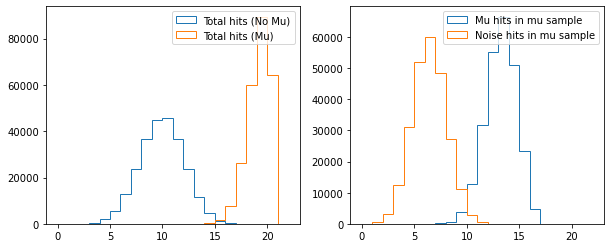

In [11]:
ncols, nrows = (2,1)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols,4*nrows))
axs = axs.flatten()

axs[0].hist(data['ev_n_signals'][Y_mu==0], histtype='step', bins=22, range=(0,22), label='Total hits (No Mu)')
axs[0].hist(data['ev_n_signals'][Y_mu==1], histtype='step', bins=22, range=(0,22), label='Total hits (Mu)')
axs[0].legend()

axs[1].hist(data['ev_n_mu_signals'][Y_mu==1], histtype='step', bins=22, range=(0,22), label='Mu hits in mu sample')
axs[1].hist(data['ev_n_signals'][Y_mu==1]-data['ev_n_mu_signals'][Y_mu==1], histtype='step', bins=13, range=(0,13), label='Noise hits in mu sample')
axs[1].legend()

plt.show()

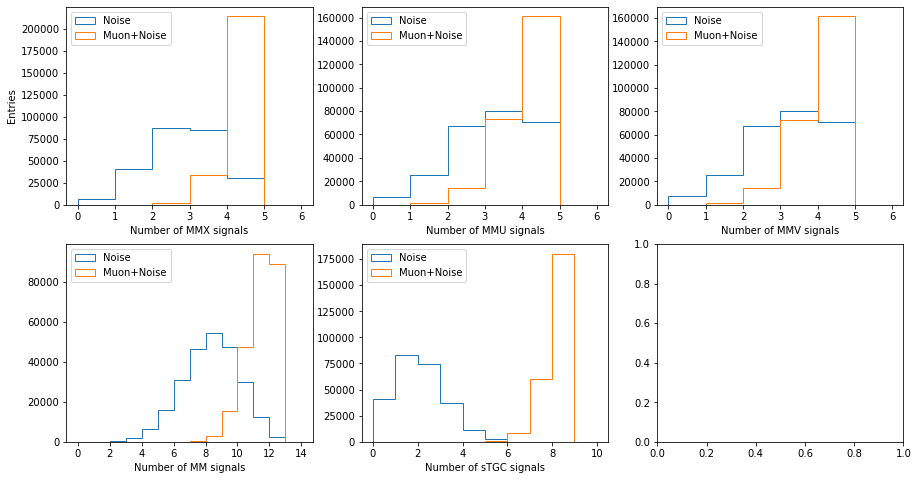

In [17]:
ncols, nrows = (3,2)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols,4*nrows))
axs = axs.flatten()

axs[0].hist(data['n_sig_mmx'][Y_mu==0], histtype='step', range=(0,6), bins=6, label='Noise')
axs[0].hist(data['n_sig_mmx'][Y_mu==1], histtype='step', range=(0,6), bins=6, label='Muon+Noise')
axs[0].legend(loc='upper left')
axs[0].set_xlabel('Number of MMX signals')
axs[0].set_ylabel('Entries')

axs[1].hist(data['n_sig_mmu'][Y_mu==0], histtype='step', range=(0,6), bins=6, label='Noise')
axs[1].hist(data['n_sig_mmu'][Y_mu==1], histtype='step', range=(0,6), bins=6, label='Muon+Noise')
axs[1].legend(loc='upper left')
axs[1].set_xlabel('Number of MMU signals')

axs[2].hist(data['n_sig_mmv'][Y_mu==0], histtype='step', range=(0,6), bins=6, label='Noise')
axs[2].hist(data['n_sig_mmv'][Y_mu==1], histtype='step', range=(0,6), bins=6, label='Muon+Noise')
axs[2].legend(loc='upper left')
axs[2].set_xlabel('Number of MMV signals')

axs[3].hist(data['n_sig_mm'][Y_mu==0], histtype='step', range=(0,14), bins=14, label='Noise')
axs[3].hist(data['n_sig_mm'][Y_mu==1], histtype='step', range=(0,14), bins=14, label='Muon+Noise')
axs[3].legend(loc='upper left')
axs[3].set_xlabel('Number of MM signals')

axs[4].hist(data['n_sig_stgc'][Y_mu==0], histtype='step', range=(0,10), bins=10, label='Noise')
axs[4].hist(data['n_sig_stgc'][Y_mu==1], histtype='step', range=(0,10), bins=10, label='Muon+Noise')
axs[4].legend(loc='upper left')
axs[4].set_xlabel('Number of sTGC signals')

plt.show()

In [ ]:
dmat.shape[2]

In [ ]:
ncols=4
nrows=5
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols,4*nrows))
axs = axs.flatten()

for ivar in range(dmat.shape[2]):

    valid_hits_mu   = dmat[Y_mu == 1,:,sig_keys.index('is_muon')].flatten() > -90
    valid_hits_nomu = dmat[Y_mu == 0,:,sig_keys.index('is_muon')].flatten() > -90

    this_var_mu   = dmat[Y_mu == 1,:,ivar].flatten()[valid_hits_mu]
    this_var_nomu = dmat[Y_mu == 0,:,ivar].flatten()[valid_hits_nomu]
    
    this_max = np.max([*this_var_mu, *this_var_nomu])
    this_min = np.min([*this_var_mu, *this_var_nomu])
        
    axs[ivar].hist( this_var_nomu, histtype='step', range=(this_min, this_max), bins=50, label = 'No muon Evts'  )
    axs[ivar].hist( this_var_mu, histtype='step', range=(this_min, this_max), bins=50, label = 'Muon Evts' )    

    axs[ivar].set_xlabel(sig_keys[ivar])
    
    if ivar == dmat.shape[2] - 1:
        axs[ivar].legend()
    
plt.show()

In [ ]:
X_prep = datatools.training_prep(dmat, sig_keys)

In [ ]:
ncols=4
nrows=5
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols,4*nrows))
axs = axs.flatten()

for ivar in range(X_prep.shape[2]):

    this_var_mu   = X_prep[Y_mu == 1,:,ivar].flatten()
    this_var_nomu = X_prep[Y_mu == 0,:,ivar].flatten()
    
    this_max = np.max([*this_var_mu, *this_var_nomu])
    this_min = np.min([*this_var_mu, *this_var_nomu])
        
    axs[ivar].hist( this_var_nomu, histtype='step', range=(this_min, this_max), bins=50, label = 'No muon Evts'  )
    axs[ivar].hist( this_var_mu, histtype='step', range=(this_min, this_max), bins=50, label = 'Muon Evts' )    

    axs[ivar].set_xlabel(sig_keys[ivar])
    
    if ivar == X_prep.shape[2] - 1:
        axs[ivar].legend()
    
plt.show()